In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("brain.csv")

In [3]:
df.head()

,Index,Brain Weight,Body Weight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


In [4]:
import altair as alt

In [5]:
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

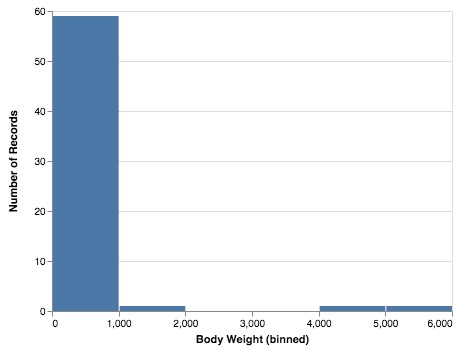

In [6]:
alt.Chart(df).mark_bar().encode(
    x=alt.X("Body Weight",bin=True),
    y= "count()"
)

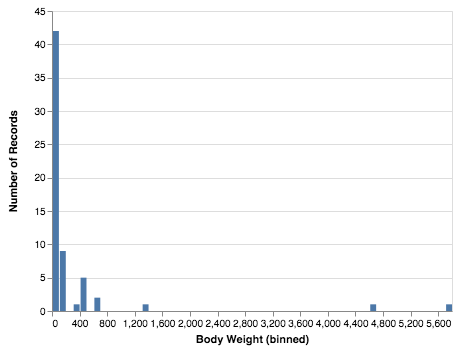

In [7]:
body_chart = alt.Chart(df).mark_bar().encode(
    x=alt.X("Body Weight",bin=alt.Bin(maxbins=100)),
    y= "count()"
)
body_chart

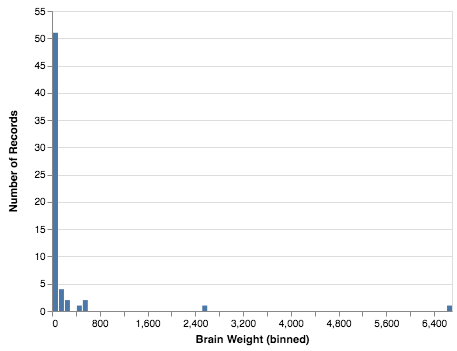

In [8]:
brain_chart = alt.Chart(df).mark_bar().encode(
    x=alt.X("Brain Weight",bin=alt.Bin(maxbins=100)),
    y= "count()"
)
brain_chart

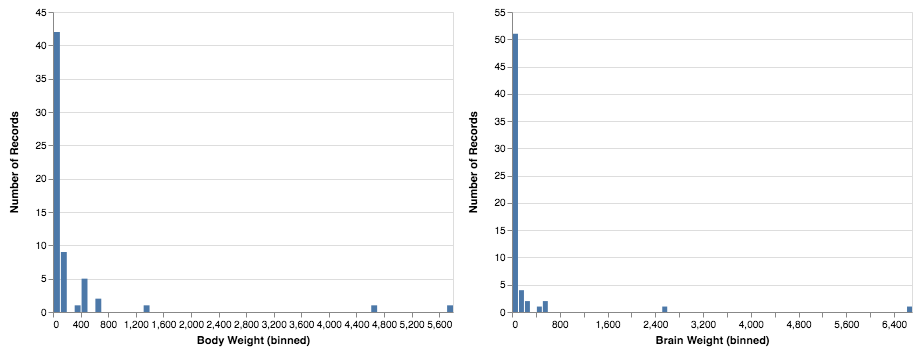

In [9]:
total_chart=body_chart|brain_chart
total_chart

In [10]:
total_chart.save("test.html")

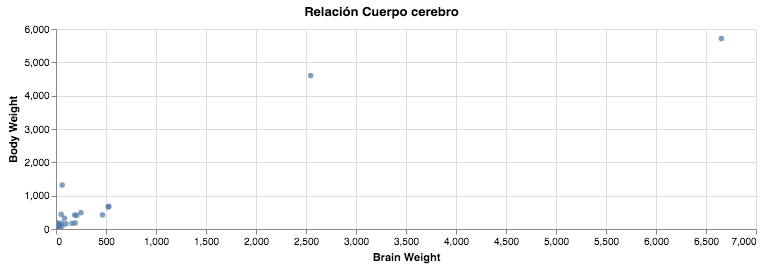

In [11]:
scatter = alt.Chart(df).mark_circle().encode(
    x="Brain Weight",
    y="Body Weight"
).interactive().properties(
    width=700,
    height=200,
    title="Relación Cuerpo cerebro"
)
scatter

In [12]:
scatter.save("test.html")

In [13]:
total_chart = (brain_chart|body_chart)&scatter

In [14]:
total_chart.save("test.html")

### Trends

In [15]:
trends = pd.read_csv("google_trends.csv")

In [16]:
trends.head()

,date,search_term,value
0,2004-01,SPSS data,6
1,2004-02,SPSS data,8
2,2004-03,SPSS data,7
3,2004-04,SPSS data,7
4,2004-05,SPSS data,6


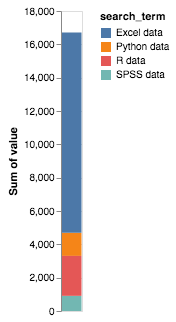

In [17]:
line=alt.Chart(trends).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
)
line

comp=alt.Chart(trends).mark_bar().encode(
    y="sum(value)",
    color="search_term"
)
comp

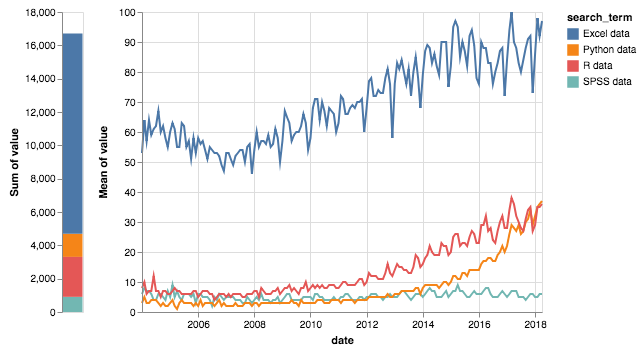

In [19]:
select_search_term = alt.selection_single(encodings=["color"])

line=alt.Chart(trends).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
    
).transform_filter(
select_search_term.ref())
line

comp=alt.Chart(trends).mark_bar().encode(
    y="sum(value)",
    color="search_term",
    tooltip="sum(value)"
).properties(
selection=select_search_term)
comp

comp|line

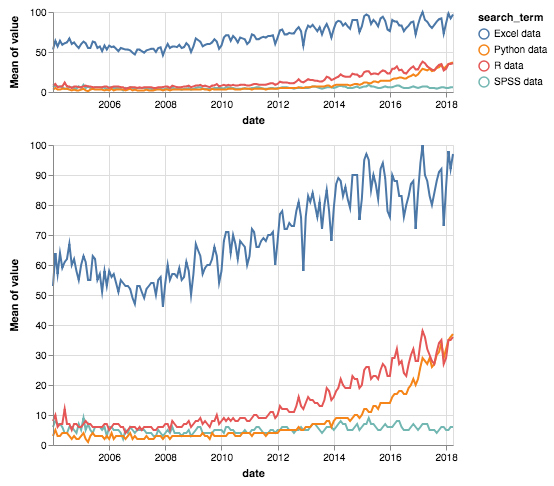

In [20]:
select_date = alt.selection_interval(encodings=["x"])

line_little=alt.Chart(trends).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
).properties(
     height=80,
    selection=select_date
)
line_little

line=alt.Chart(trends).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
).transform_filter(
select_date.ref()
)
line

line_little&line

In [21]:
banks = pd.read_csv("../clean_data/banks.csv")

In [22]:
banks.head()

,Unnamed: 0,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,PITTSBURGH,4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,EAST PEORIA,5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,LIMA,7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,FLORENCE,7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,LEWISPORT,8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [25]:
banks.rename(columns={"Institution Type":"inst_type"},inplace=True)

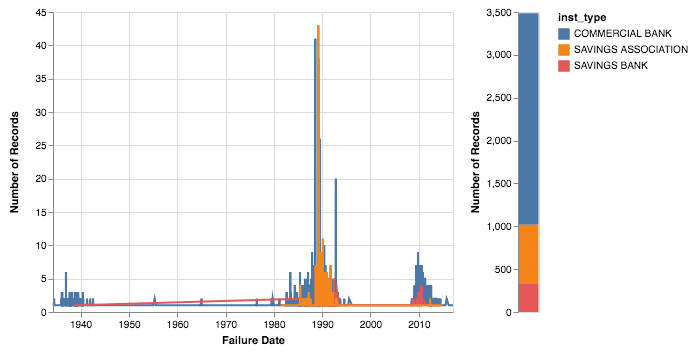

In [27]:
select_institution = alt.selection_single(encodings=["color"])

line=alt.Chart(banks).mark_line().encode(
    x="Failure Date:T",
    y="count()",
    color="inst_type",
).transform_filter(
select_institution.ref()
)
line

comp=alt.Chart(banks).mark_bar().encode(
    y="count()",
    color="inst_type",
    tooltip="count()"
).properties(selection=select_institution)
comp

line|comp

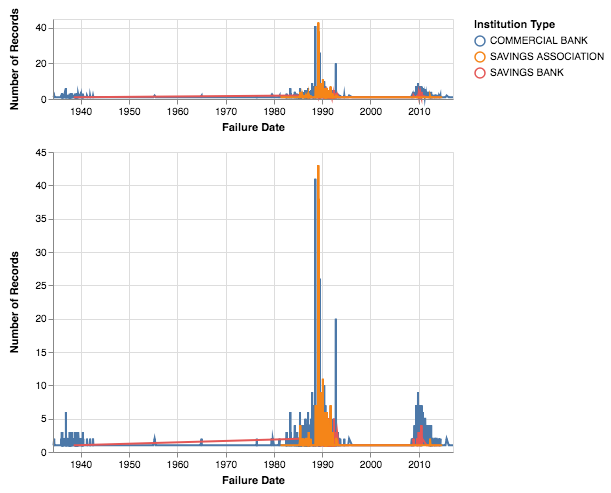

In [24]:
select_date = alt.selection_interval(encodings=["x"])

line_little=alt.Chart(banks).mark_line().encode(
    x="Failure Date:T",
    y="count()",
    color="Institution Type",
).properties(
     height=80,
    selection=select_date
)
line_little

line=alt.Chart(banks).mark_line().encode(
    x="Failure Date:T",
    y="count()",
    color="Institution Type",
).transform_filter(
select_date.ref()
)
line

line_little&line